## Load LLM model

In [1]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

torch.random.manual_seed(0)

model = AutoModelForCausalLM.from_pretrained(
    "microsoft/Phi-3.5-mini-instruct",
    device_map="cuda",
    torch_dtype="auto",
    trust_remote_code=True,
)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Phi-3.5-mini-instruct")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.45k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-mini-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.8k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3.5-mini-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/195 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.98k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

## Crawl data from web

In [2]:
import requests
from bs4 import BeautifulSoup

url = "https://vnexpress.net/khoa-hoc"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

new_box = soup.find("div",{"class":"col-left col-small"} )
articles = new_box.find_all("article",{"class":"item-news item-news-common"})

news_arr = []

for article in articles[:3]:
    title = article.find("a").text.strip()
    p_tag = article.find('p', class_='description')
    intro = p_tag.find("a").text.strip()
    news_arr.append(title +"\n" + intro)



In [3]:
news_arr

['Trung Quốc phát hiện mỏ đất hiếm 1,15 triệu tấn\nMỏ mới tại tỉnh Vân Nam chứa các nguyên tố đất hiếm trung bình và nặng, phục vụ cho nhiều ngành từ điện tử thương mại đến xe điện.',
 'AI giúp ngăn giẫm đạp ở lễ hội tôn giáo lớn nhất hành tinh\nCảnh sát Ấn Độ đã lắp đặt 300 camera thu thập hình ảnh, nạp vào thuật toán AI để cung cấp cho đội xử lý nhằm ngăn chặn tình trạng giẫm đạp ở lễ hội hành hương Kumbh Mela.',
 'Lươn đầm lầy châu Á đe dọa hệ sinh thái Florida\nCác nhà khoa học kêu gọi người dân giúp kiểm soát lươn đầm lầy châu Á, một đặc sản tại bản địa nhưng lại là loài xâm lấn ở Mỹ.']

## Make prompt for the image generation

In [4]:
prompts = []

for new in news_arr:
    prompt = "Write a prompt which is begin with 'Create an illustration', there is no Vietnamese in the prompt, to generate an image of an article which is about: " + new
    messages = [
    {"role": "system", "content": "You are a helpful AI assistant."},
    {"role": "user", "content": prompt}
    ]

    pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    )

    generation_args = {
    "max_new_tokens": 500,
    "return_full_text": False,
    "temperature": 0.0,
    "do_sample": False,
    }

    output = pipe(messages, **generation_args)
    prompts.append(output[0]['generated_text'])



Device set to use cuda
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48
Device set to use cuda
Device set to use cuda


In [5]:
prompts

[" Create an illustration depicting a vibrant and futuristic cityscape centered around the newly discovered rare earth mineral deposit in Vân Nam province, Trung Quốc. The image should showcase a bustling mining site with advanced machinery extracting 1,15 triệu tấn of the valuable minerals. Include diverse elements such as workers in high-tech gear, conveyor belts transporting the minerals, and a skyline with towering structures symbolizing various industries like electronics manufacturing and electric vehicle production that benefit from this resource. The illustration should convey the significance of this discovery in boosting Trung Quốc's technological and economic growth, with a clear emphasis on sustainability and innovation.",
 ' Create an illustration depicting a high-tech security operation at the Kumbh Mela festival, showcasing 300 strategically placed cameras capturing every moment. Visualize the integration of advanced AI technology processing these live feeds to identify 

In [6]:
# Out of memory XD
del model
del tokenizer
import gc
gc.collect()

50

## Load stable diff model

In [7]:
from diffusers import DiffusionPipeline

pipe = DiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16"
)
pipe.to("cuda")

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.32.1",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Gen pictures

In [8]:
images_list = []

for prompt in prompts:
  image = pipe(prompt).images[0]
  images_list.append(image)

Token indices sequence length is longer than the specified maximum sequence length for this model (143 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["tech gear, conveyor belts transporting the minerals, and a skyline with towering structures symbolizing various industries like electronics manufacturing and electric vehicle production that benefit from this resource. the illustration should convey the significance of this discovery in boosting trung quốc's technological and economic growth, with a clear emphasis on sustainability and innovation."]
Token indices sequence length is longer than the specified maximum sequence length for this model (143 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["tech gear, conveyor belts

  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['in ensuring the safety and peace of the largest spiritual congregation on earth. include elements such as the bustling crowd, the grandeur of the festival, and the silent yet vigilant ai systems working in the background.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['in ensuring the safety and peace of the largest spiritual congregation on earth. include elements such as the bustling crowd, the grandeur of the festival, and the silent yet vigilant ai systems working in the background.']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [", with informative captions and statistics to emphasize the importance of community involvement in preserving the region's biodiversity."]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [", with informative captions and statistics to emphasize the importance of community involvement in preserving the region's biodiversity."]


  0%|          | 0/50 [00:00<?, ?it/s]

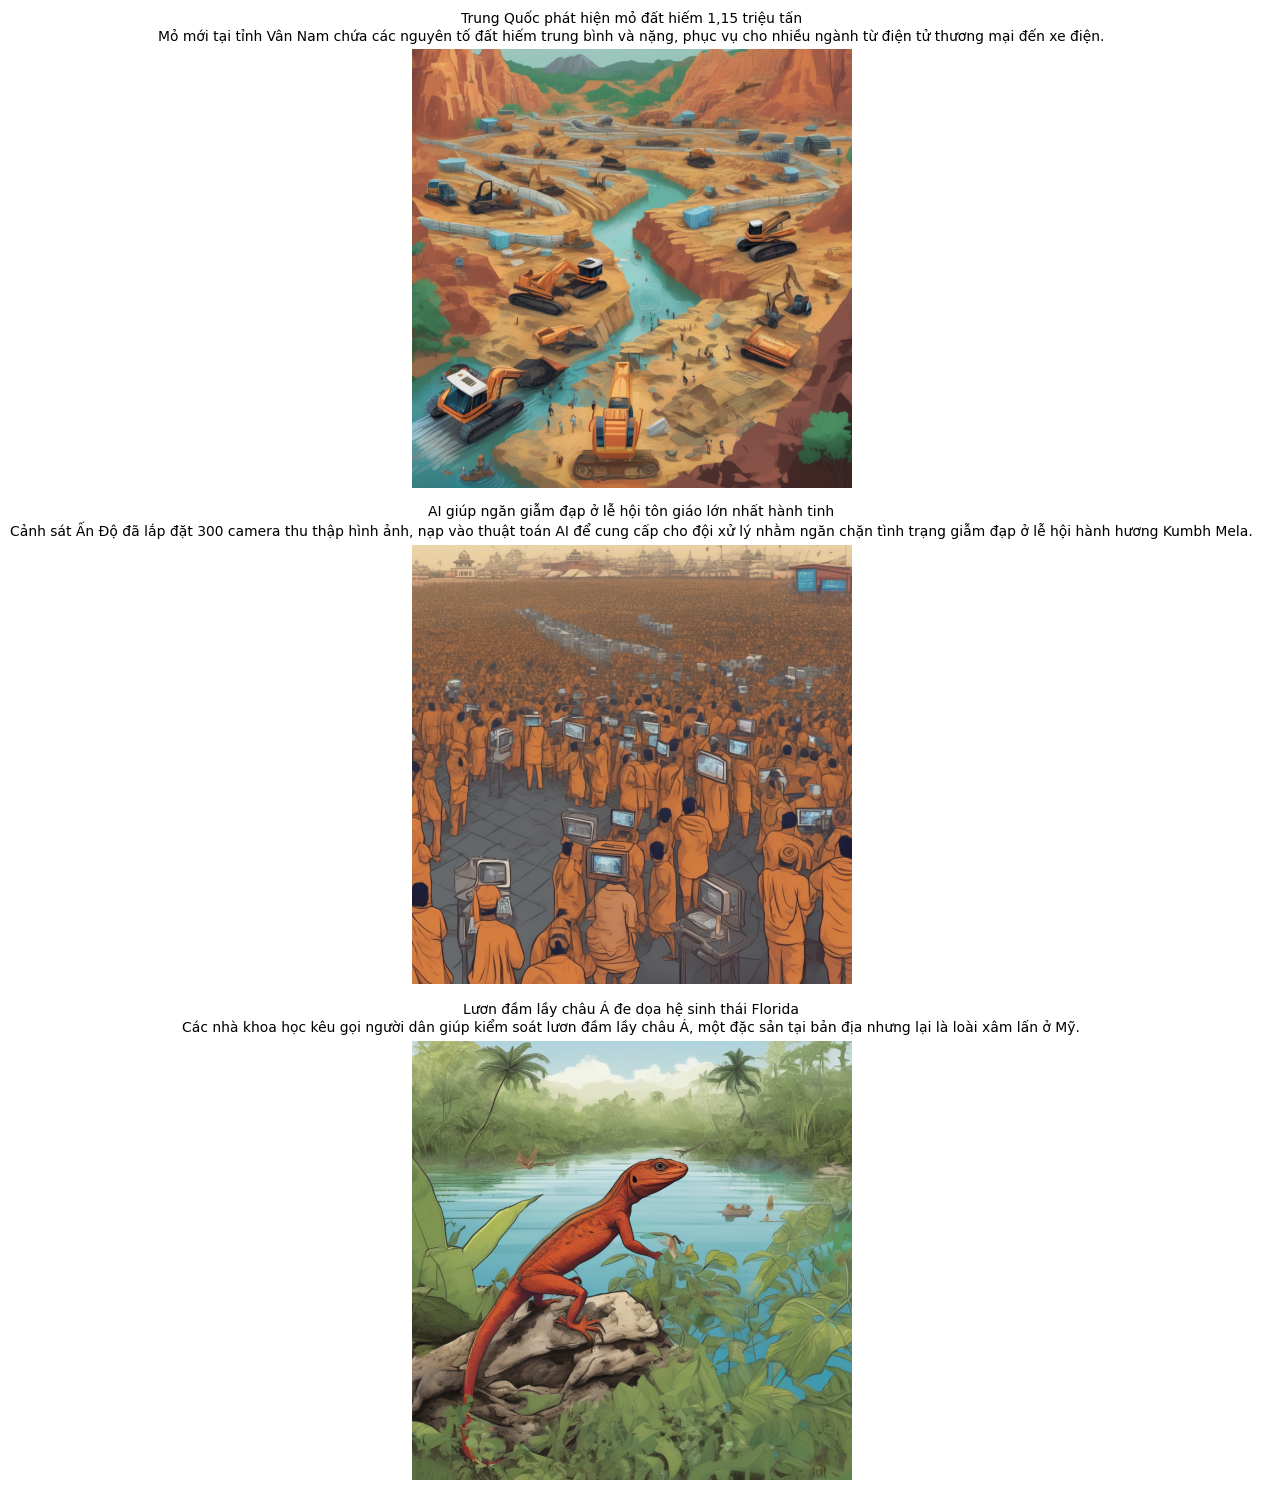

In [14]:
import matplotlib.pyplot as plt


# Kiểm tra số lượng ảnh và caption
assert len(images_list) == len(news_arr), "Number of images and captions must be the same!"

# Số hàng và cột của grid
rows, cols = 3, 1

# Kích thước figure
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Hiển thị ảnh và caption
for i, ax in enumerate(axes.flat):
    if i < len(images_list):  # Đảm bảo index không vượt quá danh sách ảnh
        ax.imshow(images_list[i])
        ax.set_title(news_arr[i], fontsize=10)
        ax.axis('off')  # Ẩn các trục
    else:
        ax.axis('off')  # Ẩn ô thừa

# Tăng khoảng cách giữa các subplots
plt.tight_layout()
plt.show()